In [58]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df_train = pd.read_csv('train.csv', nrows = 100000, parse_dates = ['pickup_datetime'])

df_train.drop(columns = 'key')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1
1,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1
2,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2
3,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1
4,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1
5,12.100,2011-01-06 09:50:45+00:00,-74.001,40.732,-73.973,40.758,1
6,7.500,2012-11-20 20:35:00+00:00,-73.980,40.752,-73.974,40.765,1
7,16.500,2012-01-04 17:22:00+00:00,-73.951,40.774,-73.990,40.751,1
8,9.000,2012-12-03 13:10:00+00:00,-74.006,40.727,-73.993,40.732,1
9,8.900,2009-09-02 01:11:00+00:00,-73.981,40.734,-73.992,40.758,2


In [3]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.500,2009-06-15 17:26:21+00:00,-73.844,40.721,-73.842,40.712,1
1,2010-01-05 16:52:16.0000002,16.900,2010-01-05 16:52:16+00:00,-74.016,40.711,-73.979,40.782,1
2,2011-08-18 00:35:00.00000049,5.700,2011-08-18 00:35:00+00:00,-73.983,40.761,-73.991,40.751,2
3,2012-04-21 04:30:42.0000001,7.700,2012-04-21 04:30:42+00:00,-73.987,40.733,-73.992,40.758,1
4,2010-03-09 07:51:00.000000135,5.300,2010-03-09 07:51:00+00:00,-73.968,40.768,-73.957,40.784,1


In [4]:
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [5]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,11.355,-72.495,39.914,-72.491,39.919,1.674
std,9.717,10.694,6.226,10.471,6.213,1.300
min,-44.900,-736.550,-74.008,-84.654,-74.006,0.000
25%,6.000,-73.992,40.735,-73.991,40.734,1.000
50%,8.500,-73.982,40.753,-73.980,40.753,1.000
75%,12.500,-73.967,40.767,-73.963,40.768,2.000
max,200.000,40.788,401.083,40.851,404.617,6.000


Text(0.5, 1.0, 'Distribution of Fare')

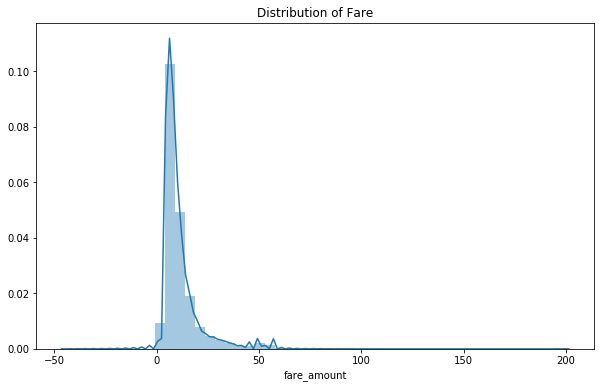

In [6]:
plt.figure(figsize = (10, 6))
sns.distplot(df_train['fare_amount'])
plt.title('Distribution of Fare')

In [7]:
print(f"There are {len(df_train[df_train['fare_amount'] < 0])} negative fares.")
print(f"There are {len(df_train[df_train['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(df_train[df_train['fare_amount'] > 100])} fares greater than $100.")

There are 9 negative fares.
There are 3 $0 fares.
There are 40 fares greater than $100.


In [8]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train['fare_amount'].between(left = 2.5, right = 100)]
print('New size: %d' % len(df_train))

Old size: 100000
New size: 99946


In [9]:
df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
print('Old size: %d' % len(df_train))
df_train = df_train.dropna()
print('New size: %d' % len(df_train))

Old size: 99946
New size: 99946


Text(0, 0.5, 'Count')

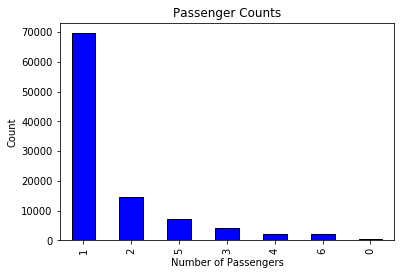

In [11]:
df_train['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k')
plt.title('Passenger Counts')
plt.xlabel('Number of Passengers')
plt.ylabel('Count')

In [12]:
len(df_train[df_train['passenger_count'] == 0])

366

In [13]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train['passenger_count'] != 0]
print('New size: %d' % len(df_train))

Old size: 99946
New size: 99580


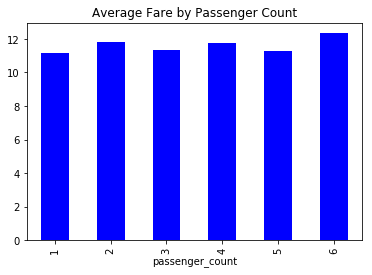

In [14]:
df_train.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

In [34]:
# Absolute difference in latitude and longitude
df_train['abs_lat_diff'] = (df_train['dropoff_latitude'] - df_train['pickup_latitude']).abs()
df_train['abs_lon_diff'] = (df_train['dropoff_longitude'] - df_train['pickup_longitude']).abs()

New York city coordinates are (https://www.travelmath.com/cities/New+York,+NY):

longitude = -74.0063889
lattitude = 40.7141667

I define a bounding box of interest by [long_min, long_max, latt_min, latt_max] using the minimum and maximum coordinates from the testset. 

In [15]:
df_test = pd.read_csv('test.csv', nrows = 100000, parse_dates = ['pickup_datetime'])

In [16]:
bounding_box = (
    min(df_test.pickup_longitude.min(), df_test.dropoff_longitude.min()),
    max(df_test.pickup_longitude.max(), df_test.dropoff_longitude.max()),
    min(df_test.pickup_latitude.min(), df_test.dropoff_latitude.min()),
    max(df_test.pickup_latitude.max(), df_test.dropoff_latitude.max())
)

bounding_box

(-74.263242, -72.986532, 40.568973, 41.709555)

In [17]:
def select_within_bounding_box(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])

In [22]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_bounding_box(df_train, bounding_box)]
print('New size: %d' % len(df_train))

Old size: 99580
New size: 97441


In [23]:
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

In [24]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

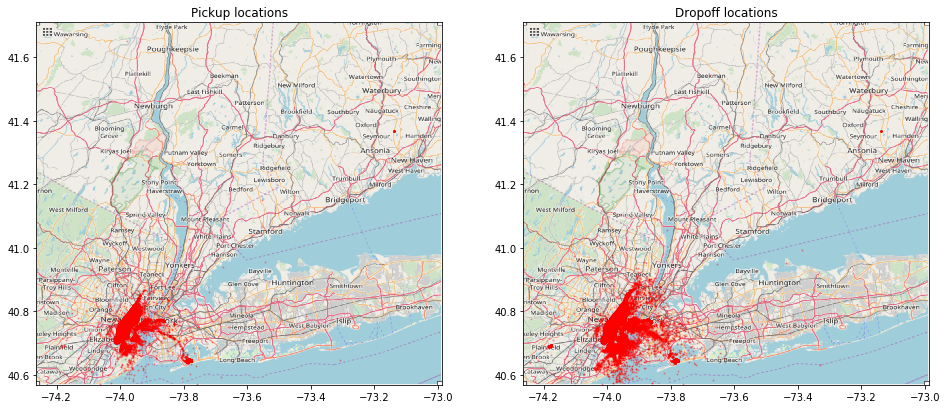

In [21]:
plot_on_map(df_train, bounding_box, nyc_map, s=1, alpha=0.3)

Haversize distance represents the shortest distance along the surface of the Earth connecting two points taking into account the fact that the Earth is a sphere

In [25]:
# Radius of the earth in kilometers
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [26]:
df_train['haversine'] =  haversine_np(df_train['pickup_longitude'], df_train['pickup_latitude'],
                         df_train['dropoff_longitude'], df_train['dropoff_latitude']) 

df_test['haversine'] = haversine_np(df_test['pickup_longitude'], df_test['pickup_latitude'],
                         df_test['dropoff_longitude'], df_test['dropoff_latitude'])

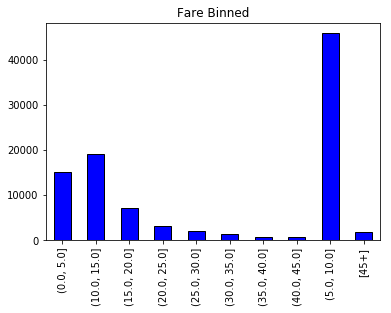

In [28]:
df_train['fare-bin'] = pd.cut(df_train['fare_amount'], bins = list(range(0, 50, 5))).astype(str)

# Uppermost bin
df_train.loc[df_train['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# Adjust bin so the sorting is correct
df_train.loc[df_train['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'

# Bar plot of value counts
df_train['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned');

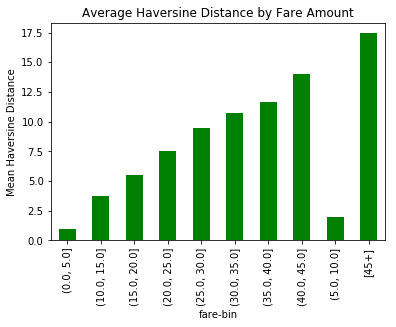

In [29]:
df_train.groupby('fare-bin')['haversine'].mean().sort_index().plot.bar(color = 'g');
plt.title('Average Haversine Distance by Fare Amount');
plt.ylabel('Mean Haversine Distance');

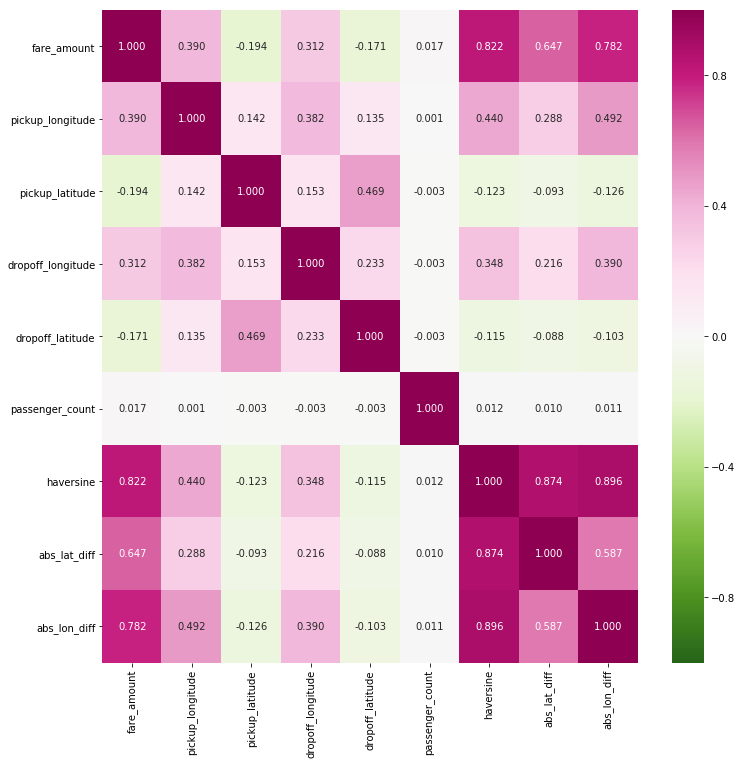

In [56]:
corrs = df_train.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

In [36]:
linear_regressor = LinearRegression()

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train,
                                                      np.array(df_train['fare_amount']), 
                                                      stratify = df_train['fare-bin'],
                                                      random_state = 1,
                                                      test_size = 25000)

In [39]:
features = ['abs_lat_diff', 'abs_lon_diff', 'passenger_count']

linear_regressor.fit(X_train[features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
y_pred = linear_regressor.predict(X_valid[features])

In [46]:
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

In [48]:
rmse

5.430470202589578

In [49]:
mean_train = y_train.mean()

In [52]:
y_mean_pred = [mean_train for _ in range(len(y_valid))]

In [55]:
mean_rmse = np.sqrt(mean_squared_error(y_valid, y_mean_pred))

In [54]:
mean_rmse

9.357023694606905

In [59]:
random_forest = RandomForestRegressor(n_estimators = 20, 
                                      max_depth = 20, 
                                      max_features = None, 
                                      oob_score = True, 
                                      bootstrap = True)

In [60]:
random_forest.fit(X_train[features], y_train)

/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [61]:
rf_y_pred = random_forest.predict(X_valid[features])

In [64]:
rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_y_pred))

In [65]:
rf_rmse

4.26451346351767